# Inserting libraries and reading the dataset 

In [67]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [68]:
# Read the dataset Data.csv

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...  DeviceProtection  \
0  No phone service             DSL             No  ...                No   
1                No             DSL            Yes  ...               Yes   
2                No             DSL            Yes  ...                No   
3  No phone service             DSL            Yes  ...               Yes   
4                No     Fiber optic             No  ...                No   

  TechSupport StreamingTV StreamingMovies        Contrac

In [69]:
#Checking for Null values

print(df.isnull().any())

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool


In [70]:
#Checking for outliers

print (df.describe(()))

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
50%         0.000000    29.000000       70.350000
max         1.000000    72.000000      118.750000


In [78]:
#Checking the datatype

print(df.dtypes)

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                object
dtype: object


### Before extracting the features, visualizing the data to see the features which has more influence on the target variable

### Plotting all categorical features against Churn

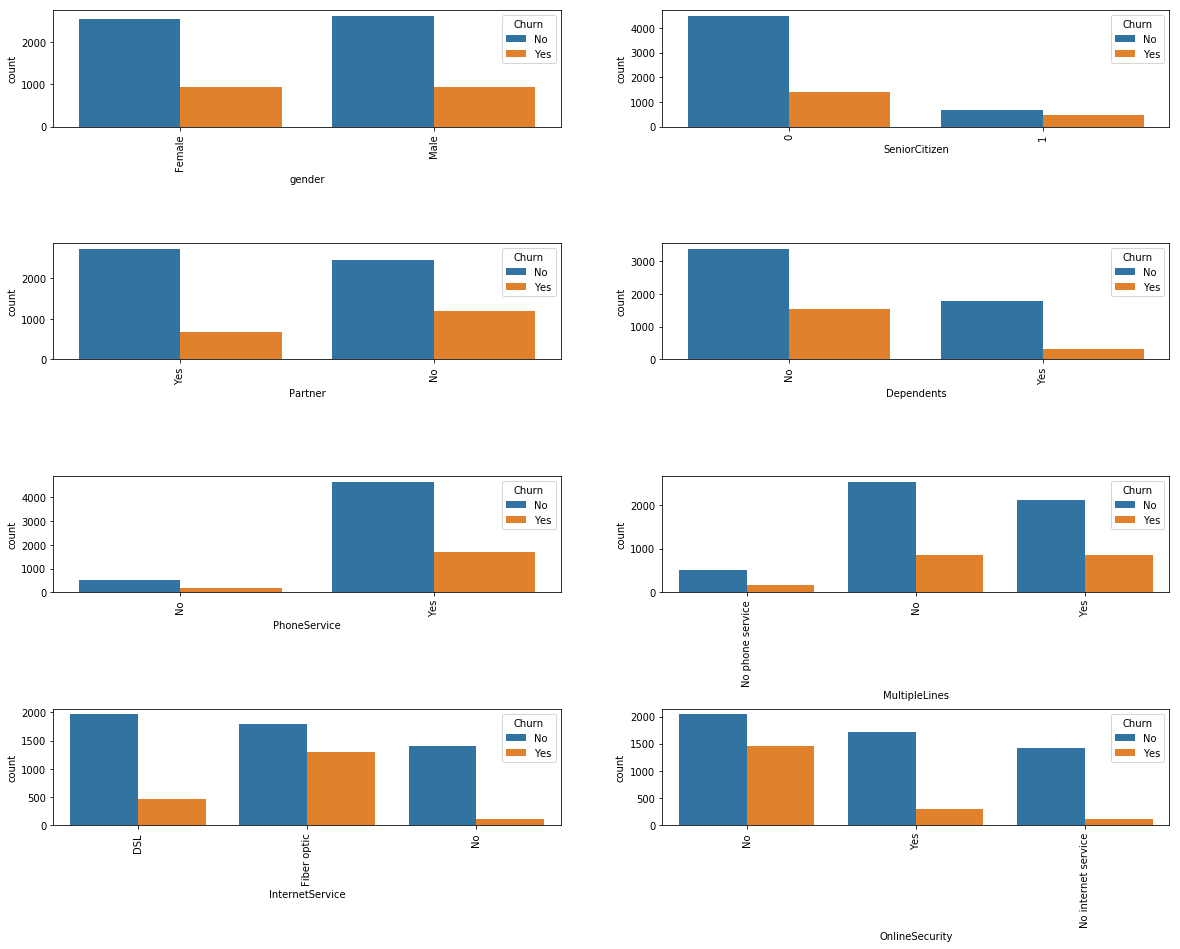

In [72]:
feature_1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']
fig=plt.subplots(figsize=(20,15))
for i, j in enumerate(feature_1):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='Churn')
    plt.xticks(rotation=90)
    plt.savefig('churn1.png')


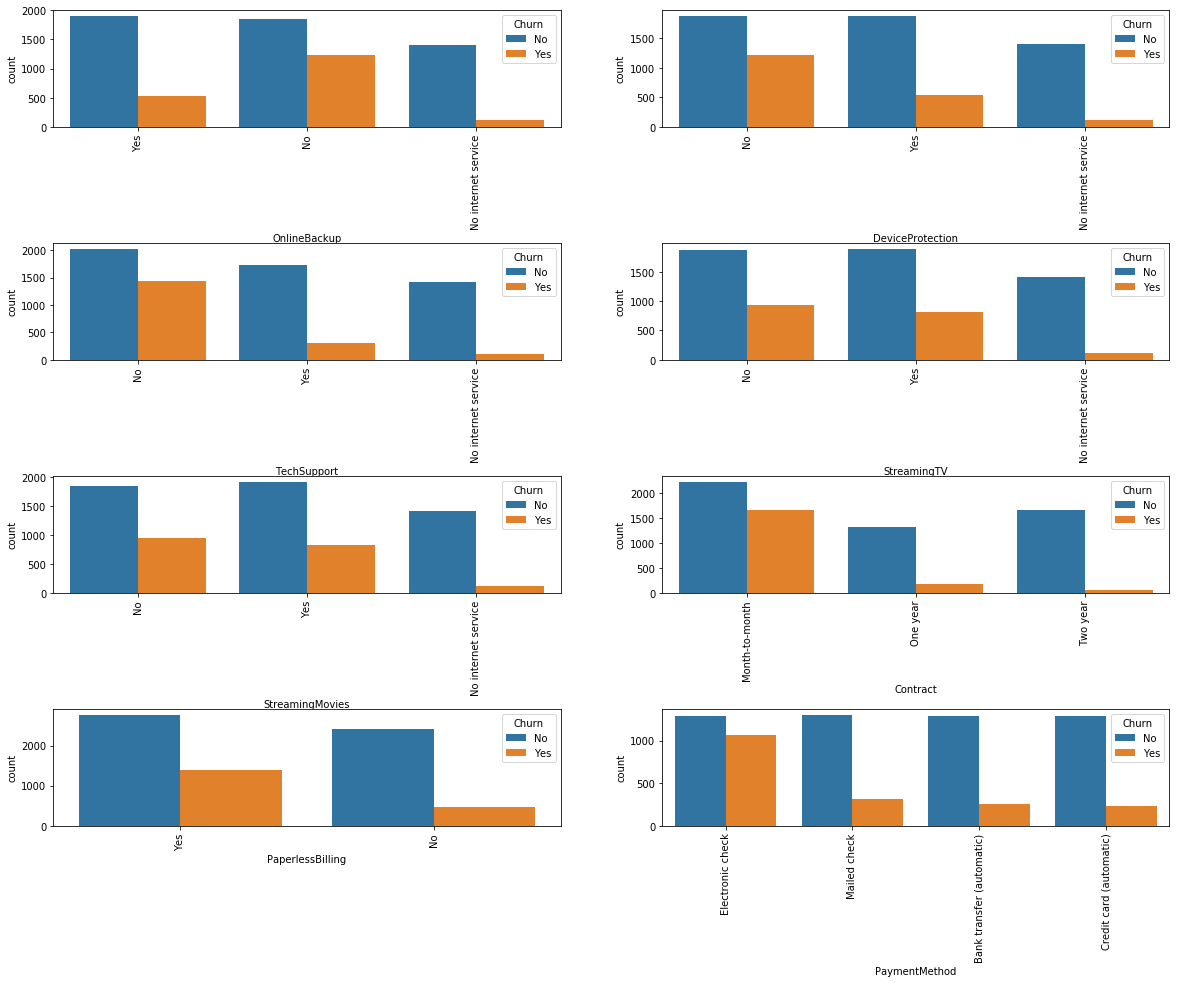

In [73]:
feature_2 = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']
fig=plt.subplots(figsize=(20,15))
for a, b in enumerate(feature_2):
    plt.subplot(4, 2, a+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=b,data = df, hue='Churn')
    plt.xticks(rotation=90)
    plt.savefig('churn2.png')

### After plotting all the categorical data against the Churn column,  from the above visualiztions, it is observed that  -

1. Gender doesn't play much role in Churn prediction.
2. Senior citizens are less likely of leaving the company, still not substantially significant.
3. Having a partner wouldn't make much of a difference.
4. Someone who doesn't have a dependent is more likely to leave the company.
5. PhoneService has an influence on the Churn data as having a PhoneService increaes the likelihood of living the company.
6. The impact of MultipleLines is not that much compared to PhoneService.
7. Internet Service has a major role to play as someone who doesn't have a internet service is less likely to leave the company.
8. A person who doesn't have an online security or online backup or Device Protection or Tech Support is more likely to leave. 
9. Contract has a major influence on Churn as those having month-to-month contract are prone to leaving the company.
10. In case of payment method, those who pays through Electronic check are more likely to leave the company.


### Label encoding

In [80]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df['gender']=le.fit_transform(df['gender'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['TotalCharges']=le.fit_transform(df['TotalCharges'])
#df['TotalCharges'] = df['TotalCharges'].astype('int') 

#print(df.head())

### Feature extraction

In [96]:
#Taking the features which I believe has greater influence on Churn data

X = df[['SeniorCitizen', 'Partner', 'Dependents' ,  'tenure',   'PhoneService', 'InternetService' ,  'OnlineSecurity' ,  'OnlineBackup', 'DeviceProtection', 'TechSupport',
         'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']].values

y = df.iloc[:,20].values

### Spitting the data into training and test set

In [97]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)



### Fitting Random Forest algorithm to our dataset

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Predicting the test results

In [99]:
#Predicting the test results
yrf_pred = rf_classifier.predict(X_test)




In [95]:
from sklearn import metrics

print('-------Random Forest Results--------')
#Checking accuracy
print("Accuracy:", metrics.accuracy_score(y_test, yrf_pred))


-------Random Forest Results--------
Accuracy: 0.7747278750591576


# Splitting data into Training and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature scaling 

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [11]:
#print (np.array([y]))

# Fitting the Random Forest classifier  to the dataset


In [12]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Predicting  the test set result 

In [13]:
y_pred = classifier.predict(X_test)

print (y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


# Making the confusion Matrix to look at correct / incorrect prediction our model made

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [15]:
print cm

[[63  5]
 [ 5 27]]


# It shows (63 + 27 = 90) correct predictions and (5 + 5 = 10) incorrect predictions.

# Visualizing the Training set  results 

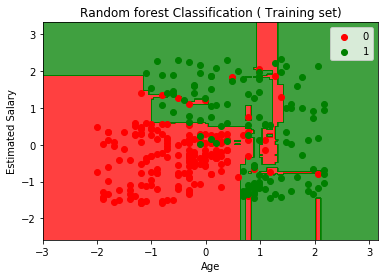

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red' , 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
               c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Random forest Classification ( Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualizing the Test set  results

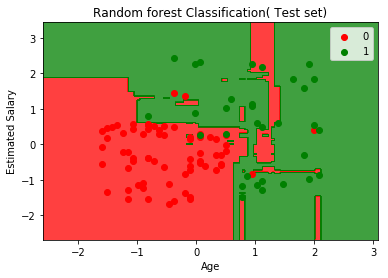

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red' , 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], 
               c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Random forest Classification( Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()